In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from math import sin, cos, log, pi

In [22]:
def limit_derivative(f, x, h):
    """ f: function to be differentiated x: the point at which to differentiate f 
h: distance between the points to be evaluated"""
# compute the derivative at x with limit definition
    return (f(x+h) - f(x)) / h

# f1(x) = sin(x)
def f1(x):
    return sin(x)

# f2(x) = x^4
def f2(x):
    return pow(x, 2)+sin(x)

# f3(x) = x^2*log(x)
def f3(x):
    return pow(x, 2) * log(x)

# Calculate derivatives here
print(limit_derivative(f3, 1, 2))
print(limit_derivative(f3, 1, 0.1))
print(limit_derivative(f3, 1, 0.00001))

4.943755299006494
1.1532531756323319
1.0000150000398844


In [23]:
print(limit_derivative(f1, 1, 2))
print(limit_derivative(f1, 1, 0.1))
print(limit_derivative(f1, 1, 0.00001))

-0.35017548837401463
0.4973637525353891
0.5402980985058647


In [24]:
print(limit_derivative(f2, 1, 2))
print(limit_derivative(f2, 1, 0.1))
print(limit_derivative(f2, 1, 0.00001))

3.649824511625985
2.5973637525353888
2.5403080985197946


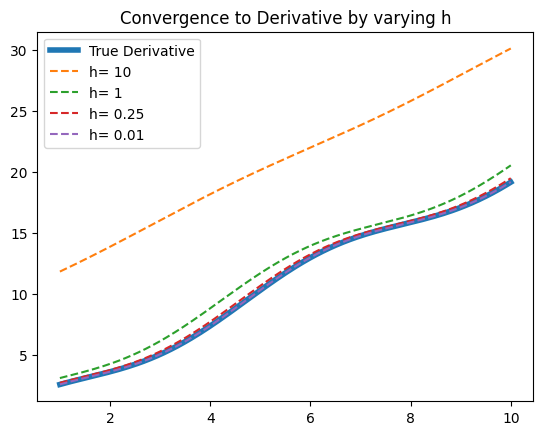

In [25]:
# Graph the true derivative
x_vals = np.linspace(1, 10, 200)
y_vals = [(2*val + cos(val)) for val in x_vals]
plt.figure(1)
plt.plot(x_vals, y_vals, label="True Derivative", linewidth=4)

# plot different approximated derivatives of f using limit definition of derivative
def plot_approx_deriv(f):
    x_vals = np.linspace(1, 10, 200)
    h_vals = [10, 1, .25, .01]

    for h in h_vals:
        derivative_values = [limit_derivative(f, x, h) for x in x_vals]
        plt.plot(x_vals, derivative_values, linestyle='--', label=f"h= {h}")
    plt.legend()
    plt.title("Convergence to Derivative by varying h")
    plt.show()

# Plot here
#plot_approx_deriv(f1)
plot_approx_deriv(f2)

In [26]:
#Congrats! That concludes our exploration into the limit definition of the derivative using Python. We have approximated derivatives at a point and whole derivative functions using the limit definition. If you would like to continue your exploration, here are some ideas:

#Modify plot_approx_deriv() so it uses np.gradient().
#Create your own functions and investigate them through plotting and calculating derivatives.
#Change the h_vals and/or x_vals to look at a different range or values.
#Compare our method of plot_approx_deriv() to plotting using np.gradient()

In [27]:
# pre-set values
significance_threshold = 0.05
sample_size = 100
lift = .3
control_rate = .5
name_rate = (1 + lift) * control_rate

# simulate a dataset
sample_control = np.random.choice(['yes', 'no'], size=sample_size//2, p=[control_rate,1-control_rate])
sample_name = np.random.choice(['yes', 'no'], size=sample_size//2, p=[name_rate, 1-name_rate])

group = ['control']*(sample_size//2) + ['name']*(sample_size//2)
outcome = list(sample_control) + list(sample_name)
sim_data = {"Email": group, "Opened": outcome}
sim_data = pd.DataFrame(sim_data)

# run a chi-square test
ab_contingency = pd.crosstab(np.array(sim_data.Email), np.array(sim_data.Opened))
chi2, pval, dof, expected = chi2_contingency(ab_contingency, correction=False)
print("P Value:")
print(pval)

# determine significance here:
result = ('significant' if pval < significance_threshold else 'not significant')

print("Result:")
print(result)


P Value:
0.15124104069328745
Result:
not significant


In [28]:
# preset values
significance_threshold = 0.05
sample_size = 100
lift = .3
control_rate = .5
name_rate = (1 + lift) * control_rate

# initialize an empty list of results
results = []

# start the loop
for _ in range(100):
  # simulate data:
  sample_control = np.random.choice(['yes', 'no'],
                                    size=sample_size // 2,
                                    p=[control_rate, 1 - control_rate])
  sample_name = np.random.choice(['yes', 'no'],
                                 size=sample_size // 2,
                                 p=[name_rate, 1 - name_rate])
  
  group = ['control'] * (sample_size // 2) + ['name'] * (sample_size // 2)
  outcome = list(sample_control) + list(sample_name)
  sim_data = {"Email": group, "Opened": outcome}
  sim_data = pd.DataFrame(sim_data)

  # run the test
  ab_contingency = pd.crosstab(np.array(sim_data.Email), np.array(sim_data.Opened))
  chi2, pval, dof, expected = chi2_contingency(ab_contingency)
  result = ('significant' if pval < significance_threshold else 'not significant')

  # append the result to our results list here:
  results.append(result)


# calculate proportion of significant results here:
results = np.array(results)
sig_prop = np.sum(results == 'significant')/100
print(f"Proportion of significant results: {sig_prop}")



Proportion of significant results: 0.25
